# Explanatory Data Analysis for the breast-cancer DATA

### Code to manually parse the breast-cancer.arff file and handle missing values

In [21]:
import arff
import pandas as pd
import numpy as np

# File path to the ARFF file
file_path = "../Data/breast-cancer.arff"

# Custom reader to handle missing values
def load_arff_with_missing_values(file_path):
    # Read the file manually to extract attributes and data
    with open(file_path, 'r') as f:
        # Manually parse the ARFF header to extract attributes
        attributes = []
        data = []
        
        # Read the file line by line
        for line in f:
            line = line.strip()
            
            # Look for attribute definitions
            if line.lower().startswith('@attribute'):
                # Simple attribute parsing (adjust if more complex parsing is needed)
                parts = line.split()
                if len(parts) >= 3:
                    attr_name = parts[1]
                    attributes.append((attr_name, parts[2]))
            
            # Look for data section
            elif line.lower().startswith('@data'):
                # Start reading actual data
                for data_line in f:
                    data_line = data_line.strip()
                    if data_line and not data_line.startswith('%'):
                        # Split the line and process missing values
                        row = []
                        for val in data_line.split(','):
                            # Replace '?' with NaN
                            row.append(np.nan if val.strip() == '?' else val.strip())
                        data.append(row)
                break
        
        return data, [attr[0] for attr in attributes]

# Load the data
data, columns = load_arff_with_missing_values(file_path)

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Show the result
print("First 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Optional: Check missing values
print("\nMissing values:")
print(df.isnull().sum())

First 5 rows:
       age  menopause tumor-size inv-nodes node-caps deg-malig   breast  \
0  '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1  '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2  '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3  '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4  '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   

  breast-quad 'irradiat'                 'Class'  
0   'left_up'       'no'     'recurrence-events'  
1   'central'       'no'  'no-recurrence-events'  
2  'left_low'       'no'     'recurrence-events'  
3  'left_low'      'yes'  'no-recurrence-events'  
4  'right_up'       'no'     'recurrence-events'  

Dataset shape: (286, 10)

Columns: ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', "'irradiat'", "'Class'"]

Missing values:
age            0
menopause      0
tumor-size     0
i

### Remove quotes, rename columns, fill missing values


In [22]:
# Remove quotes from all string values
df = df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)

# Rename weird columns
df.rename(columns={"'irradiat'": "irradiat", "'Class'": "Class"}, inplace=True)

# Fix missing values: fill with mode (most common value)
df['node-caps'].fillna(df['node-caps'].mode()[0], inplace=True)
df['breast-quad'].fillna(df['breast-quad'].mode()[0], inplace=True)

# Confirm fix
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Check unique classes
print("\nClass distribution:")
print(df['Class'].value_counts())



Missing values after cleaning:
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

Class distribution:
Class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64


C:\Users\emink\AppData\Local\Temp\ipykernel_23732\4151239192.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)
C:\Users\emink\AppData\Local\Temp\ipykernel_23732\4151239192.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['node-caps'].fillna(df['node-caps'].mode()[0], inplace=True)
C:\Users\emink\AppData\Local\Temp\ipykernel_23732\4151239192.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame

In [23]:
# Fix applymap deprecation
df = df.map(lambda x: x.strip("'") if isinstance(x, str) else x)

# Proper fillna method without inplace warnings
df = df.fillna({
    'node-caps': df['node-caps'].mode()[0],
    'breast-quad': df['breast-quad'].mode()[0]
})


### Count plots for each categorical feature grouped by Class


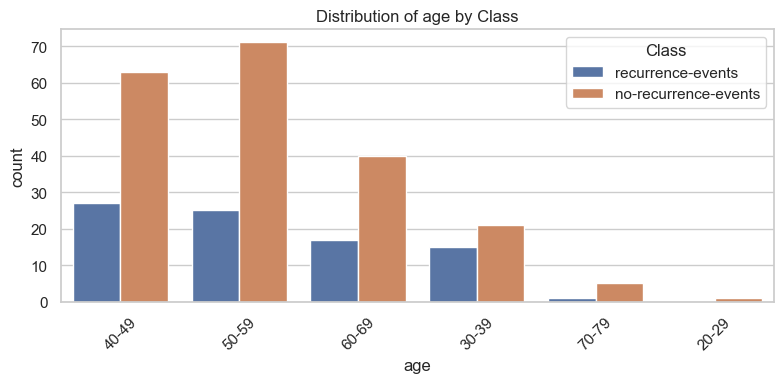

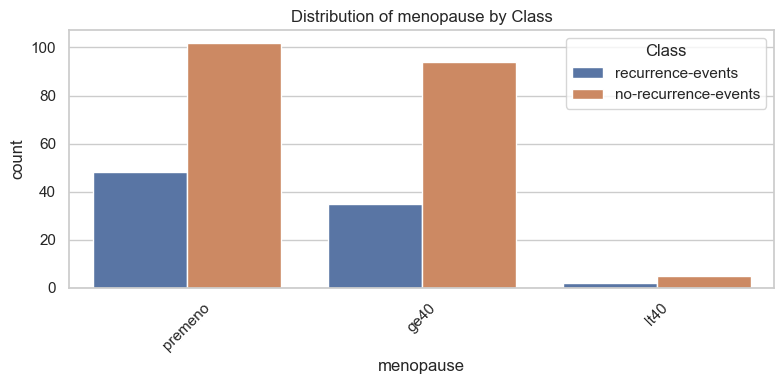

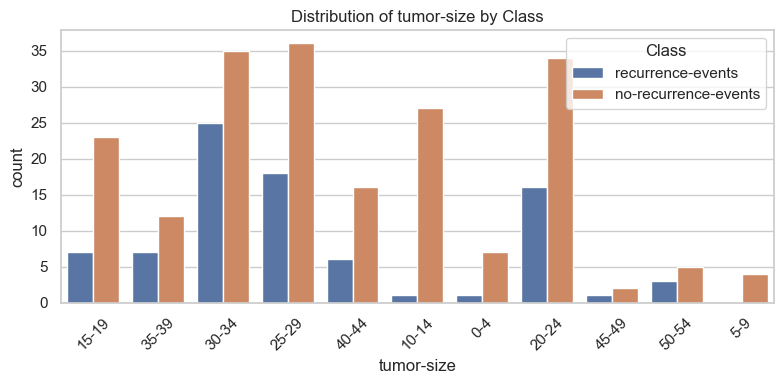

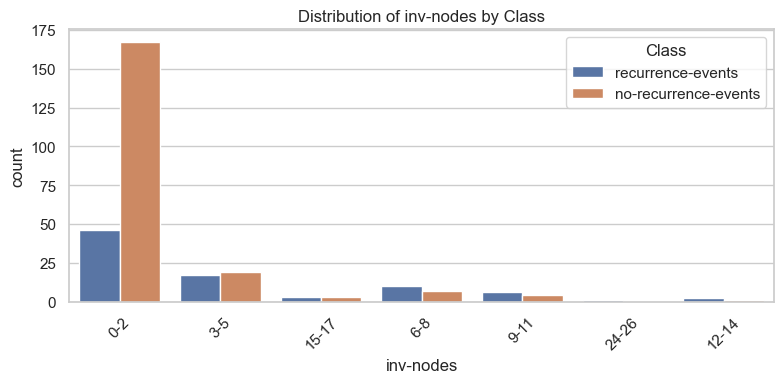

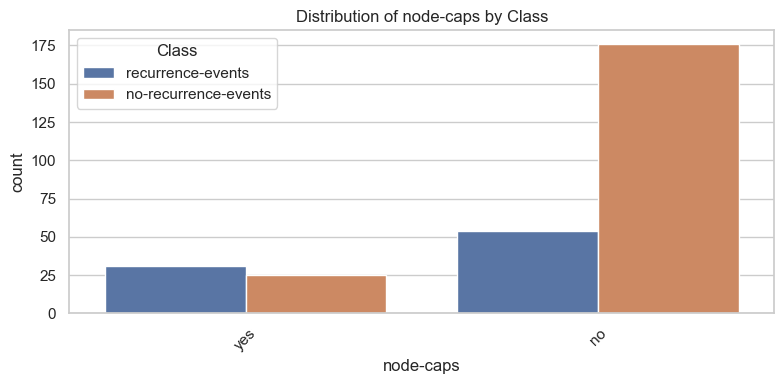

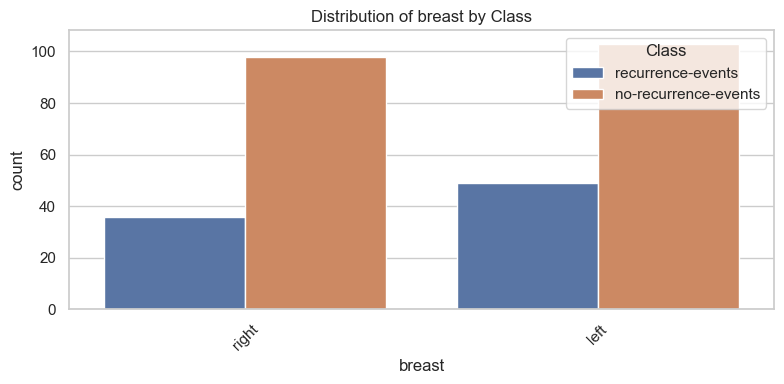

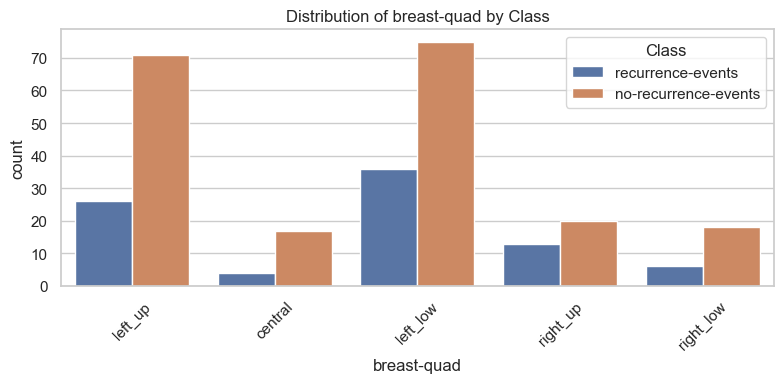

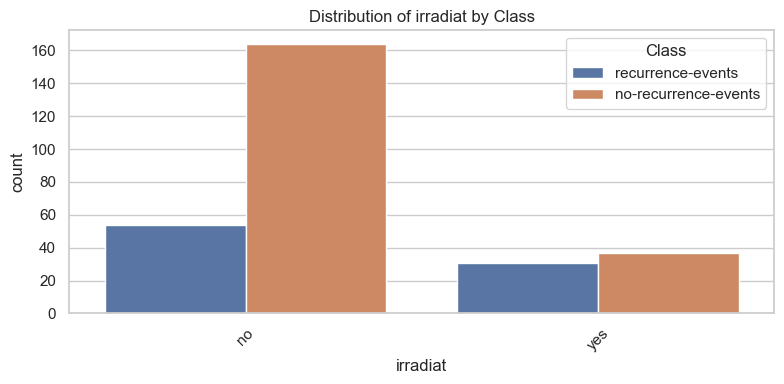

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# Plot count plots for key categorical features
cat_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
                'breast', 'breast-quad', 'irradiat']

for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue="Class")
    plt.title(f"Distribution of {feature} by Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Save Clean Version of Dataset (Pre-Feature Engineering)


In [26]:
# Save a clean copy of the dataset before any feature engineering
clean_df = df.copy()  # keep untouched version for safety
clean_df.to_csv("../Data/breast_cancer_cleaned.csv", index=False)

print("Saved as '../Data/breast_cancer_cleaned.csv'")

Saved as '../Data/breast_cancer_cleaned.csv'
